In [ ]:
!pip install scikit-learn

In [ ]:
!pip install vecstack

  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19861 sha256=15398e9ecd916d3dafd13c812c46e4c8bb26ee5a9beac8e75a9da604b7c3487e
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Splitting

In [53]:
df = pd.read_excel("/content/atompair.xlsx")
X = df.loc[:, 0:2047]
y = df ['logsi']
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4
)

Voting

In [ ]:
model_1 = XGBRegressor()
model_2 = RandomForestRegressor()
model_3 = SVR()
model_4 = DecisionTreeRegressor()
model_5 = AdaBoostRegressor()


final_model = VotingRegressor(estimators=[('xgb', model_1), ('rf', model_2), ('svr', model_3), ('dt', model_4), ('ada', model_5)],
                             n_jobs=5)

final_model.fit(X_train, y_train)
pred_final = final_model.predict(X_test)

print("Score: ", r2_score(y_test, pred_final))
print("RMSE: ",mean_squared_error(y_test, pred_final))

Score:  0.5786627299984439
RMSE:  3.7647526348753138


Average

In [ ]:

model_1 = XGBRegressor()
model_2 = RandomForestRegressor()
model_3 = SVR()
model_4 = DecisionTreeRegressor()
model_5 = AdaBoostRegressor()

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)
model_5.fit(X_train, y_train)

pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)
pred_4 = model_4.predict(X_test)
pred_5 = model_5.predict(X_test)

y_pred = (pred_1+pred_2+pred_3+pred_4+pred_5)/5.0

print("Score: ", r2_score(y_test,y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred))



Score:  0.5575283093676529
RMSE:  3.95359390627777


Stacking

In [54]:
base_models = [
    ('rf', RandomForestRegressor()),
    ('xgb', XGBRegressor())
    ]


# Define the meta-model
meta_model = LinearRegression()

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the model
stacking_regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = stacking_regressor.predict(X_train)
y_test_pred = stacking_regressor.predict(X_test)
print (f'Train score - : {r2_score(y_train,y_train_pred):.3f}')
print("RMSE_train: ",mean_squared_error(y_train, y_train_pred))
print (f'Test score - : {r2_score(y_test,y_test_pred):.3f}')
print("RMSE_test: ",mean_squared_error(y_test, y_test_pred))


Train score - : 0.978
RMSE_train:  0.01900476205141315
Test score - : 0.645
RMSE_test:  0.28710126784967616


In [57]:
import pickle
filename = 'sel_regressor.pkl'
pickle.dump(stacking_regressor, open(filename, 'wb'))

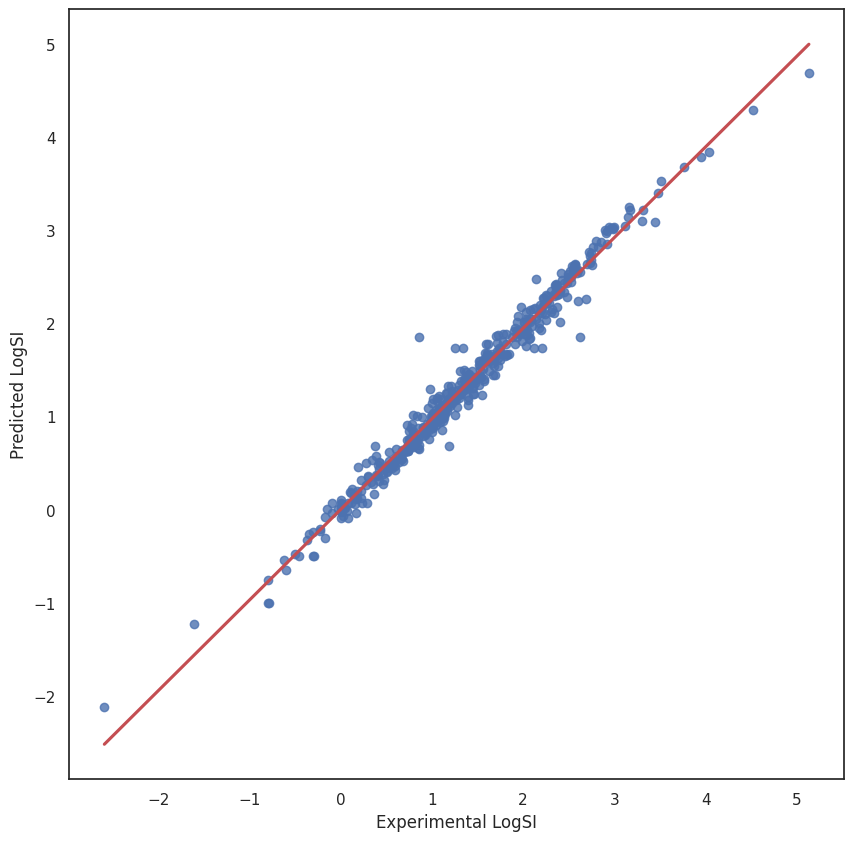

In [58]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")
plt.figure(figsize=(10,10))
sns.regplot(x = y_train, y = y_train_pred, line_kws=dict(color="r"), ci=None)
plt.xlabel('Experimental LogSI')
plt.ylabel('Predicted LogSI')
plt.savefig('sel_regplot_train.png')

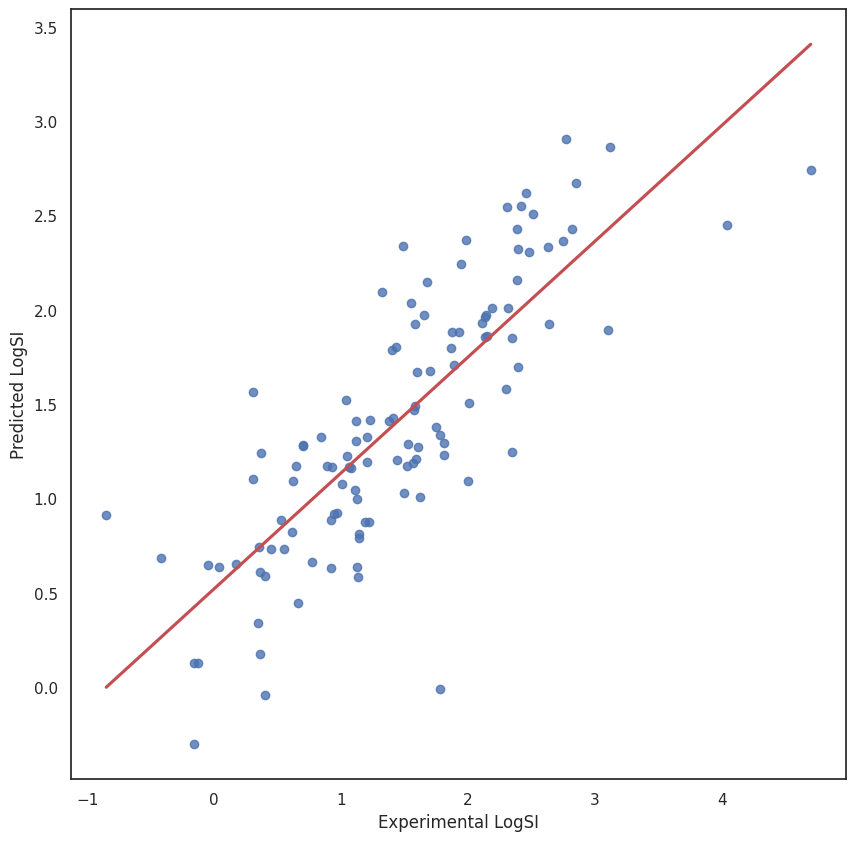

In [59]:
sns.set(color_codes=True)
sns.set_style("white")
plt.figure(figsize=(10,10))
sns.regplot(x = y_test, y = y_test_pred, line_kws=dict(color="r"), ci=None)
plt.xlabel('Experimental LogSI')
plt.ylabel('Predicted LogSI')
plt.savefig('sel_regplot_test.png')

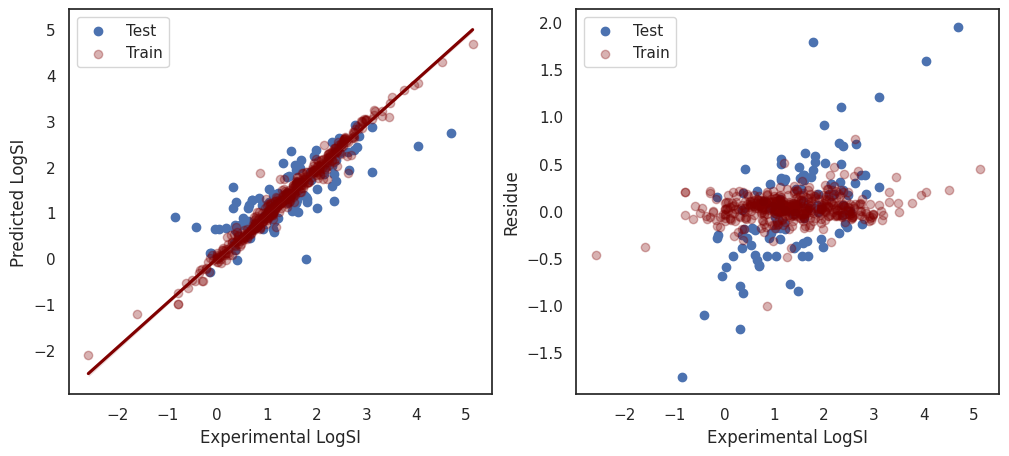

In [60]:
plt.figure(figsize=(12,5))
y_pred_train = stacking_regressor.predict(X_train)
y_pred_test = stacking_regressor.predict(X_test)

plt.subplot(121)
plt.scatter(y_test, stacking_regressor.predict(X_test), label='Test')
sns.regplot(x = y_train, y = stacking_regressor.predict(X_train), color = 'maroon',scatter_kws={'alpha':0.3}, label='Train' )
plt.xlabel('Experimental LogSI')
plt.ylabel('Predicted LogSI')
plt.legend();

plt.subplot(122)
plt.scatter(y_test, (y_test - y_pred_test), label='Test')
plt.scatter(y_train, (y_train - y_pred_train), c='maroon',label='Train', alpha = 0.3)
plt.xlabel('Experimental LogSI')
plt.ylabel('Residue')
plt.legend();
plt.savefig('act.png', dpi=200, bbox_inches='tight')

In [61]:
train_stats = X_train.describe()
print("Training Set Statistics:")
print(train_stats)

# Summarize statistics for the test set
test_stats = X_test.describe()
print("\nTest Set Statistics:")
print(test_stats)

Training Set Statistics:
                0           1           2           3           4           5  \
count  464.000000  464.000000  464.000000  464.000000  464.000000  464.000000   
mean     0.812500    0.709052    0.495690    0.198276    0.790948    0.614224   
std      0.390734    0.454690    0.500521    0.399131    0.407070    0.487303   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000    1.000000    0.000000    0.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    0.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7           8           9  ...        2038   2039  \
count  464.000000  464.000000  464.000000  464.000000  ...  464.000000  464.0   
mean     0.327586    0.120690    0.461207    0.144397  ...    0.006466    0.0   
st